In [87]:
import pandas as pd

# read the dataframe
df_2017 = pd.read_csv('data/IPEDS_2017.csv')

# drop the unnecessary columns
df_2017.drop('Unnamed: 0', axis = 1, inplace = True)

df_2017

,UnitID,Name,Percent on any financial aid,Number in financial aid cohort,Average total grant aid,Percent of students awarded Pell grants,Total amount of Pell grant aid awarded,Average amount Pell grant aid awarded,Percent of students awarded federal student loans,Average amount of federal student loans awarded,...,SAT EBRW 25th percentile,SAT EBRW 75th percentile,SAT Math 25th percentile,SAT Math 75th percentile,ACT Composite 25th percentile,ACT Composite 75th percentile,ACT English 25th percentile,ACT English 75th percentile,ACT Math 25th percentile,ACT Math 75th percentile
0,222178,Abilene Christian University,97.0,3666.0,18914.0,27.0,4176566.0,4223.0,52.0,10767.0,...,510.0,620.0,515.0,600.0,21.0,26.0,20.0,26.0,20.0,26.0
1,138558,Abraham Baldwin Agricultural College,68.0,5140.0,4393.0,45.0,8978887.0,3857.0,38.0,5281.0,...,470.0,570.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0
2,126182,Adams State University,75.0,1949.0,8361.0,48.0,4548663.0,4818.0,49.0,6918.0,...,430.0,540.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,22.0
3,188429,Adelphi University,87.0,5266.0,17920.0,32.0,7387255.0,4384.0,60.0,7188.0,...,530.0,620.0,530.0,620.0,22.0,27.0,21.0,27.0,21.0,27.0
4,168528,Adrian College,96.0,1670.0,24197.0,34.0,2472156.0,4375.0,76.0,6781.0,...,480.0,580.0,470.0,568.0,19.0,25.0,18.0,25.0,16.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,206622,Xavier University,92.0,4645.0,20749.0,16.0,3310818.0,4486.0,54.0,6793.0,...,540.0,620.0,520.0,620.0,22.0,28.0,22.0,29.0,21.0,27.0
811,160904,Xavier University of Louisiana,83.0,2345.0,15402.0,52.0,6114981.0,5029.0,66.0,7132.0,...,490.0,590.0,470.0,588.0,20.0,26.0,20.0,27.0,18.0,25.0
812,197708,Yeshiva University,88.0,2684.0,26853.0,17.0,2097575.0,4540.0,25.0,6325.0,...,600.0,710.0,560.0,710.0,23.0,29.0,23.0,31.0,22.0,29.0
813,217059,York College of Pennsylvania,88.0,4171.0,8202.0,27.0,4830041.0,4367.0,69.0,6504.0,...,500.0,590.0,500.0,600.0,20.0,25.0,19.0,24.0,18.0,26.0


In [48]:
enrolled_buckets = []

# get the enrolled column into buckets
for idx, row in df_2017.iterrows():
    
    value = row['Enrolled total']
    
    # for enrolled total less than or equal to 500
    if value <= 500:
        enrolled_buckets.append('0-500')
    
    # for enrolled total between 500 (excluding) and 1000 (including)
    elif 500 < value <= 1000:
        enrolled_buckets.append('500-1000')
        
    # for enrolled total between 1000 (excluding) and 1500 (including)
    elif 1000 < value <= 1500:
        enrolled_buckets.append('1000-1500')
        
    # for enrolled total between 1500 (excluding) and 2000 (including)
    elif 1500 < value <= 2000:
        enrolled_buckets.append('1500-2000')
        
    # for enrolled total between 2000 (excluding) and 2500 (including)
    elif 2000 < value <= 2500:
        enrolled_buckets.append('2000-2500')
    
    # otherwise the enrolled total is labled '2500+'
    else:
        enrolled_buckets.append('2500+')    

In [49]:
# set the bucket list equal to the row in the df
df_2017['Enrolled total'] = enrolled_buckets

In [88]:
# encode the state column
df_2017 = pd.get_dummies(df_2017, columns = ['State'])

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# initalize the x and y variables
x = df_2017.loc[:, (df_2017.columns != 'Enrolled total') & (df_2017.columns != 'Name')].values
y = df_2017.loc[:, 'Enrolled total'].values

#initialize Random Forest Classifier and cross validation
rf_clf = RandomForestClassifier(max_depth=5)
kfold = StratifiedKFold(n_splits = 10)

y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data
    x_test = x[test_idx, :]
    
    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)



In [79]:
from sklearn.metrics import accuracy_score

# get accuracy score
accuracy_score(y_true = y, y_pred = y_pred)

0.8785276073619632

In [82]:
import matplotlib.pyplot as plt

def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

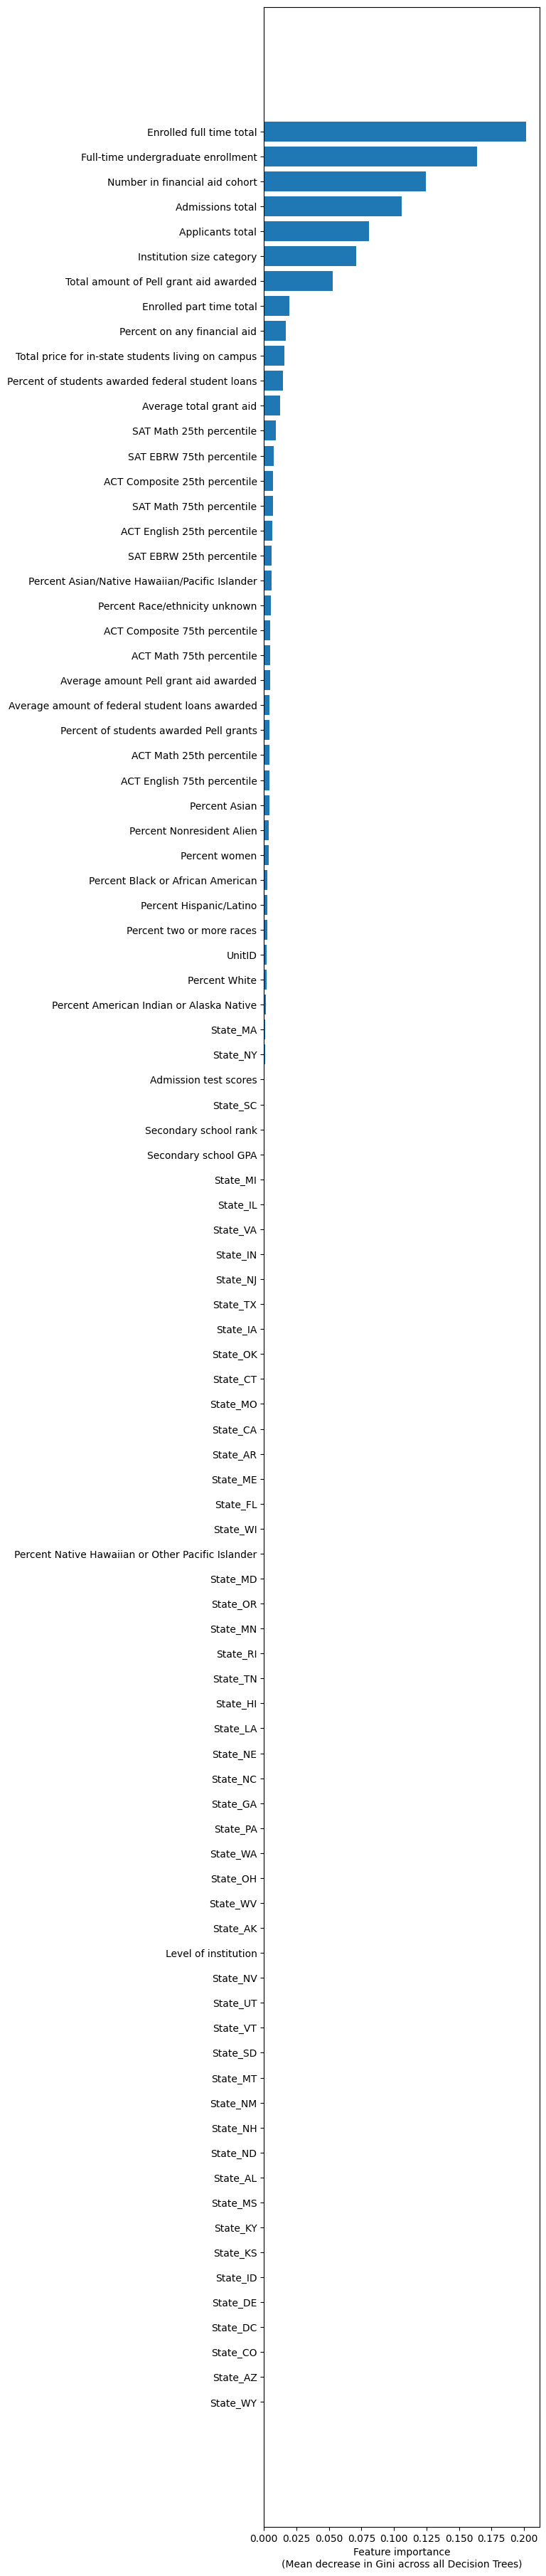

In [83]:
# plot the feature importances
x_feat_list = df_2017.loc[:, (df_2017.columns != 'Enrolled total') & (df_2017.columns != 'Name')].columns
plot_feat_import(x_feat_list, rf_clf.feature_importances_)

In [ ]:
import pandas as pd

# read the dataframe
df_2017 = pd.read_csv('data/IPEDS_2017.csv')

# drop the unnecessary columns
df_2017.drop('Unnamed: 0', axis = 1, inplace = True)

df_2017

In [ ]:
# encode the state column
df_2017 = pd.get_dummies(df_2017, columns = ['State'])

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

# initalize the x and y variables
x = df_2017.loc[:, 'Percent on any financial aid':'Enrolled part time total'].values
y = df_2017.loc[:, 'ACT Composite 75th percentile'].values

#initialize Random Forest Regressor and cross validation
rf_reg = RandomForestRegressor(max_depth=5)
kfold = KFold(n_splits = 10)

y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data
    x_test = x[test_idx, :]
    
    # fit data
    rf_reg = rf_reg.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_reg.predict(x_test)



In [91]:
from sklearn.metrics import r2_score

# get r^2
r2_score(y_true=y, y_pred=y_pred)

0.7210043882760832

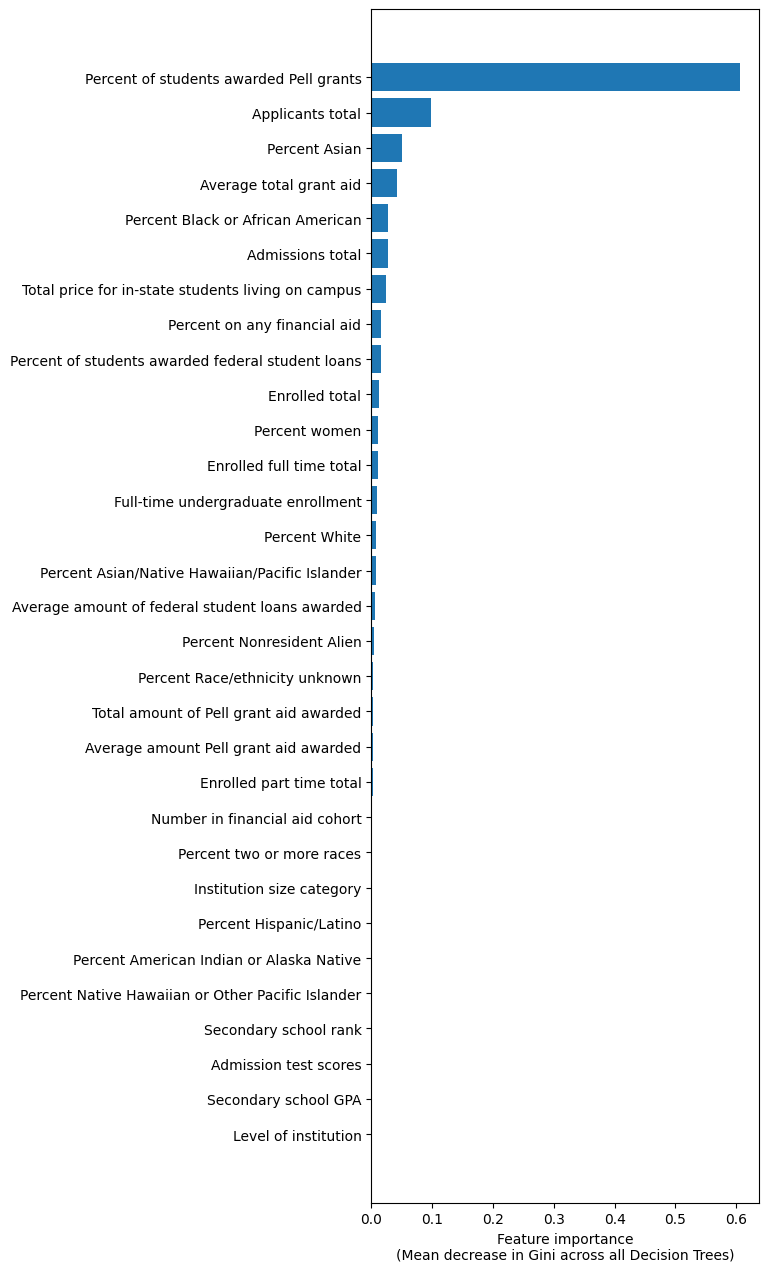

In [93]:
x_feat_list = df_2017.loc[:, 'Percent on any financial aid':'Enrolled part time total'].columns

# plot the feature importances
plot_feat_import(x_feat_list, rf_reg.feature_importances_)